<a href="https://colab.research.google.com/github/KML-Fig09/Spotify-Song-Popularity-Prediction/blob/main/NonFinalSongPredictionModelIterations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-e4e23b95de1e>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)
<ipython-input-1-e4e23b95de1e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_ms'] = np.log1p(df['duration_ms'])


Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28554 entries, 0 to 28553
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  28554 non-null  object 
 1   track_name                28549 non-null  object 
 2   track_artist              28549 non-null  object 
 3   track_popularity          28554 non-null  int64  
 4   track_album_id            28554 non-null  object 
 5   track_album_name          28549 non-null  object 
 6   track_album_release_date  28554

,track_name,track_artist,track_album_name
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,I Don't Care (with Justin Bieber) [Loud Luxury...
1,Memories - Dillon Francis Remix,Maroon 5,Memories (Dillon Francis Remix)
2,All the Time - Don Diablo Remix,Zara Larsson,All the Time (Don Diablo Remix)
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,Call You Mine - The Remixes
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,Someone You Loved (Future Humans Remix)
...,...,...,...
28549,Many Ways - Radio Edit,Ferry Corsten feat. Jenny Wahlstrom,Many Ways
28550,City Of Lights - Official Radio Edit,Lush & Simon,City Of Lights (Vocal Mix)
28551,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,Closer Remixed
28552,Sweet Surrender - Radio Edit,Starkillers,Sweet Surrender (Radio Edit)


,danceability,energy,instrumentalness,key,loudness,mode,track_popularity,duration_ms
0,0.748,0.916,0.000000,6,-2.634,1,66,12.179498
1,0.726,0.815,0.004210,11,-4.969,1,67,11.999055
2,0.675,0.931,0.000023,1,-3.432,0,70,12.081739
3,0.718,0.930,0.000009,7,-3.778,1,60,12.038210
4,0.650,0.833,0.000000,1,-4.672,1,69,12.149783
...,...,...,...,...,...,...,...,...
28549,0.581,0.640,0.000000,5,-8.367,1,27,12.190929
28550,0.428,0.922,0.000000,2,-1.814,1,42,12.227717
28551,0.522,0.786,0.004270,0,-4.462,1,20,12.774566
28552,0.529,0.821,0.000001,6,-4.899,0,14,12.255401


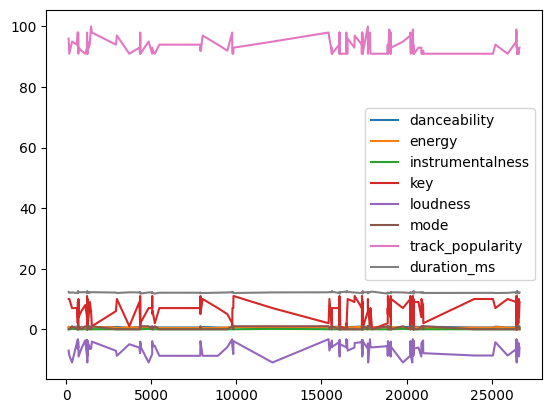

danceability         0.705281
energy               0.608081
instrumentalness     0.004840
key                  5.941176
loudness            -6.059742
mode                 0.461538
duration_ms         12.156284
dtype: float64
danceability         0.598000
energy               0.630000
instrumentalness     0.000000
key                  7.000000
loudness            -8.764000
mode                 0.000000
duration_ms         12.076658
Name: 0, dtype: float64


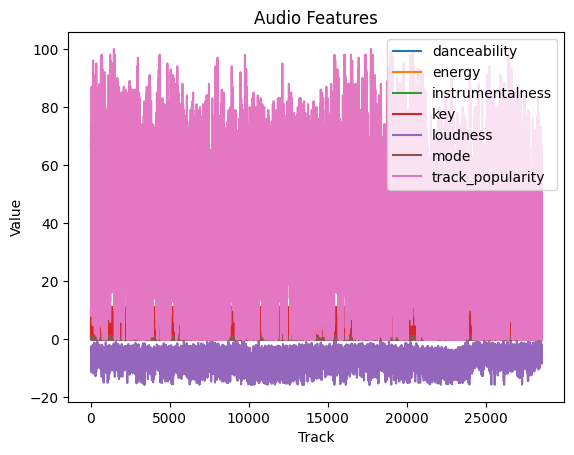

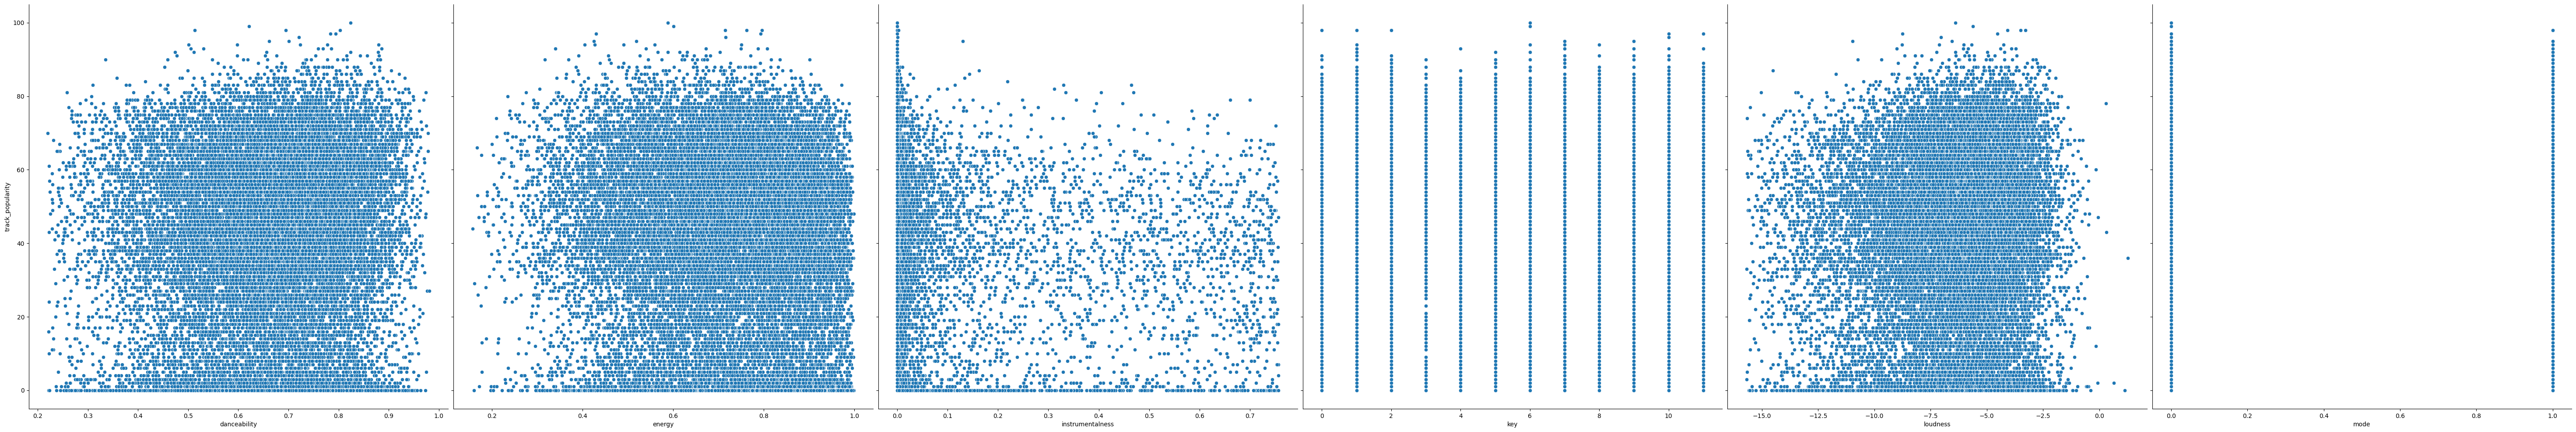

In [1]:
#Import libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import re
import IPython
from IPython.display import display
from scipy import stats

df = pd.read_csv('/content/spotify30ksongs.csv') #data file

#clean data
df.fillna(df.mean(), inplace=True)

df = df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) <3).all(axis=1)]

df.reset_index(drop=True, inplace=True)

df['duration_ms'] = np.log1p(df['duration_ms'])

#Experimental MinMaxScaling

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'mode', 'duration_ms']] = scaler.fit_transform(df[['danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'mode', 'duration_ms']])

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[['danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'mode', 'duration_ms']] = scaler.fit_transform(df[['danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'mode', 'duration_ms']])

print(df.columns)

#Retrieve data statistics

df.head()
df.describe()
df.info()

#Print all of the above if needed

df1 = df[['track_name', 'track_artist', 'track_album_name']]
df2 = df[['danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'mode', 'track_popularity', 'duration_ms']]

#Merge Data
df = pd.merge(df1, df2, left_index=True, right_index=True)

display(df1, df2)

#For personal reference, view correlations between highest values and popularity
max_popularity = df['track_popularity'].max()

df_high_popularity = df[df['track_popularity'] > 90]

mean_values = df_high_popularity[['danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'mode', 'duration_ms']].mean()
mode_values = df_high_popularity[['danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'mode', 'duration_ms']].mode().iloc[0]

df_high_popularity.plot()
plt.show()

print(mean_values)
print(mode_values)

#Plots to display Audio features

df[['danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'mode', 'track_popularity']].plot()

plt.title('Audio Features')
plt.xlabel('Track')
plt.ylabel('Value')
plt.show()

#Scatter plot for each value
sns.pairplot(df, x_vars=['danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'mode'], y_vars=['track_popularity'], height=10, aspect=1)

Mean squared error:  590.2100707243491
Coefficient of determination:  0.05715723799480488
(28554,)
(28554,)
(28554,)
(28554,)
(28554,)
(28554,)
(28554,)
(28554,)
[<class 'float'>]
[<class 'float'>]
[<class 'float'>]
[<class 'int'>]
[<class 'float'>]
[<class 'int'>]
[<class 'float'>]
[<class 'int'>]


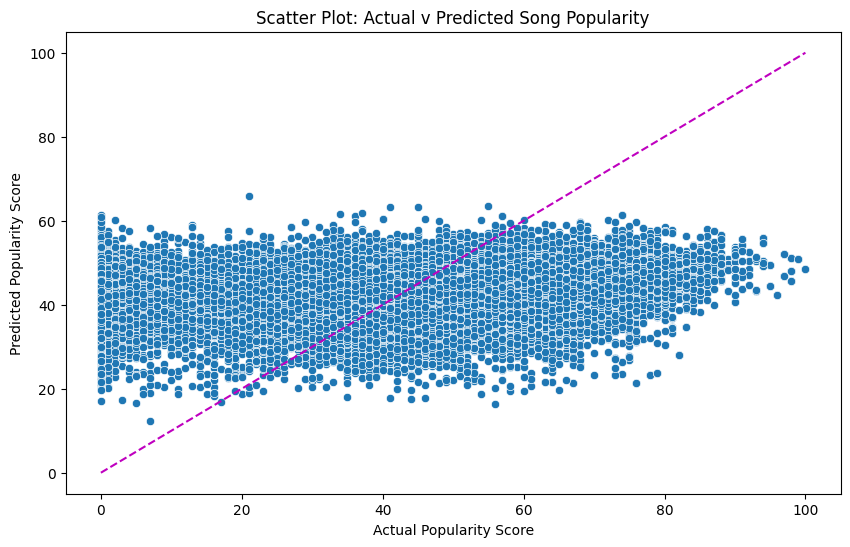

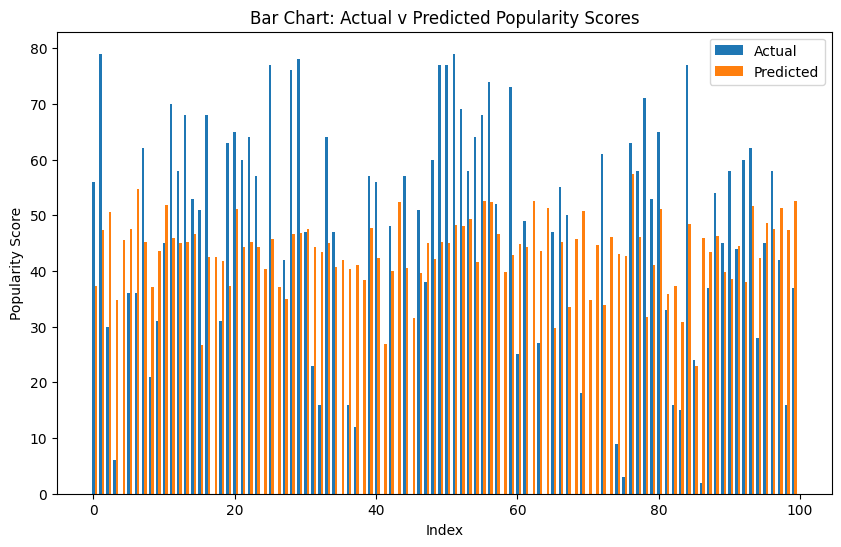

In [2]:
#NOTE: Below is used only as comparison
#Splitting data into features I wanna target
X = df[['danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'mode', 'duration_ms']]
#y = df[['Popularity Score']]
y = df['track_popularity'].squeeze()
#fit model?

model = LinearRegression()
model.fit(X, y)

#Do the predictions!
y_pred = model.predict(X)

#Evaluation of model scores
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

#Show results
print("Mean squared error: ", mse)
print("Coefficient of determination: ", r2)

print(df['danceability'].shape) #Printed value shapes here as I had issues different value dimensions and types when plotting, printing more info about each column helped solve the problem (squeeze track popularity)
print(df['energy'].shape)
print(df['instrumentalness'].shape)
print(df['key'].shape)
print(df['loudness'].shape)
print(df['mode'].shape)
print(df['duration_ms'].shape)
print(df['track_popularity'].shape)

print(df['danceability'].apply(type).unique())
print(df['energy'].apply(type).unique())
print(df['instrumentalness'].apply(type).unique())
print(df['key'].apply(type).unique())
print(df['loudness'].apply(type).unique())
print(df['mode'].apply(type).unique())
print(df['duration_ms'].apply(type).unique())
print(df['track_popularity'].apply(type).unique())


#Plot the results (data visualisation)
#Scatter:
plt.figure(figsize=(10,6))
plot = sns.scatterplot(x=y, y=y_pred)
plot.set(xlabel='Actual Popularity Score', ylabel='Predicted Popularity Score')
plt.title('Scatter Plot: Actual v Predicted Song Popularity')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'm--')
plt.show()

#Bar:
plt.figure(figsize=(10,6))
subset_size = 100
indices = np.random.choice(y.index, size=subset_size, replace=False)
y_subset = y.loc[indices]
y_pred_subset = y_pred[indices]
width = 0.35
plt.bar(np.arange(subset_size), y_subset, width, label='Actual')
plt.bar(np.arange(subset_size) + width, y_pred_subset, width, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Popularity Score')
plt.title('Bar Chart: Actual v Predicted Popularity Scores')
plt.legend()
plt.show()

#Save files and model, commented out and file names removed as not needed now
#from joblib import dump
#from google.colab import files
#from google.colab import drive
#drive.mount('/content/gdrive')

#dump(model, 'NAME.joblib'
#dump(model, '/content/gdrive/My Drive/NAME.joblib')

#files.download('NAME.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:308: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


Mean Squared Error:  1.3255990330236603e+25
Coefficient of Determination:  -2.117604418497229e+22


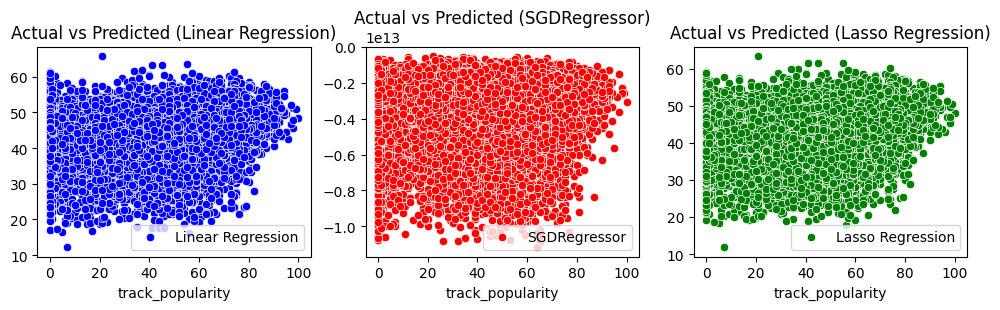

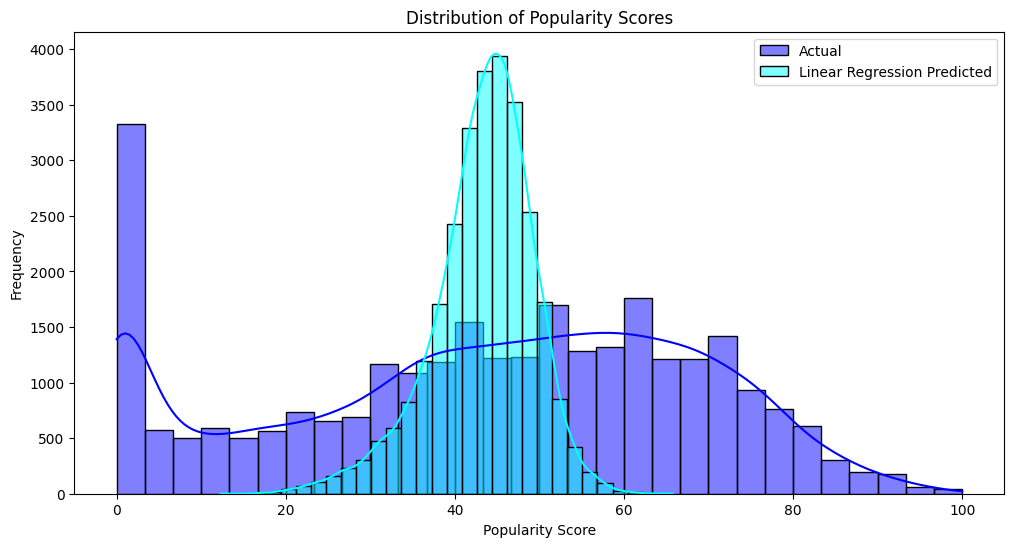

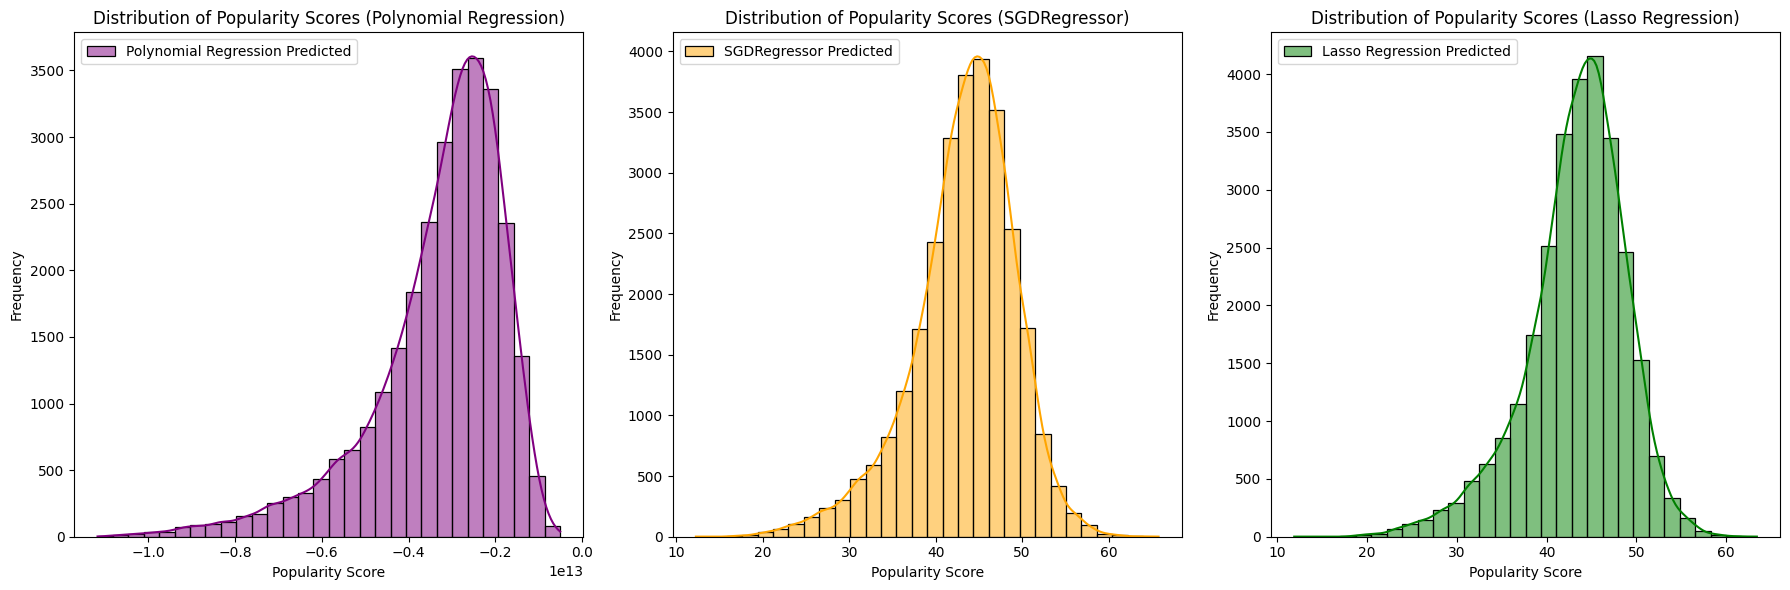

In [9]:
#New regression model using Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from scipy.sparse import csr_matrix

degree = 2 #Choosing the degree of training

poly_features = PolynomialFeatures(degree=degree)

X_poly = poly_features.fit_transform(X) #transform into Polynomial features
X_poly = csr_matrix(X_poly) #Add CSR Matrix to organise data better

selector = SelectKBest(score_func=f_regression, k=5) #selector added for preprocessing (as noted, impact is negligible.)
X_new = selector.fit_transform(X_poly, y)

poly_model = LinearRegression()
poly_model.fit(X_poly, y) #Fit model to data

sgd_reg = SGDRegressor(alpha=0.5, max_iter=1000, tol=0.03) #Choose tolerance, iterations, and alpha values)
sgd_reg.fit(X_poly, y) #Fit SGD to data

lasso_model = Lasso(alpha=0.5, max_iter=100, tol=0.03) #Choose tolerance, iteration limit, and alpha values for lasso
lasso_model.fit(X_poly, y) #Fit Lasso to data

y_poly_pred = sgd_reg.predict(X_poly) #make predictions

#Elastic Net code is commented out because using SGD, Elastic Net, Lasso, and Poly at once seemed to crash Colab).
#elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
#elastic_net_model.fit(X_poly, y)

#Calculate scores
mse = mean_squared_error(y, y_poly_pred)
r2 = r2_score(y, y_poly_pred)

#Print scores
print("Mean Squared Error: ", mse)
print("Coefficient of Determination: ", r2)

#Plot the results (here I used distribution plots in place of bar charts as they highlight where my model's predictions cluster - and bar charts do not fit polynomial regression very easily.)

plt.figure(figsize=(12, 6))

# Scatter plot Linear Regression
plt.subplot(2, 3, 1)
sns.scatterplot(x=y, y=y_pred, color='blue', label='Linear Regression')
plt.title('Actual vs Predicted (Linear Regression)')

# Scatter plot Polynomial Regression
plt.subplot(2, 3, 2)
sns.scatterplot(x=y, y=y_poly_pred, color='red', label='SGDRegressor')
plt.title('Actual vs Predicted (SGDRegressor)')

#Distribution Plot for Linear Regression
plt.figure(figsize=(12, 6))
sns.histplot(y, bins=30, kde=True, color='blue', label='Actual')
sns.histplot(y_pred, bins=30, kde=True, color='cyan', label='Linear Regression Predicted')
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Distribution Plots for Polynomial Regression, Linear Regression, and Polynomial Regression
plt.figure(figsize=(18, 6))

#Distribution plot (Polynomial Regression)
plt.subplot(1, 3, 1)
sns.histplot(y_poly_pred, bins=30, kde=True, color='purple', label='Polynomial Predictions')
plt.title('Distribution of Popularity Scores (Polynomial Regression)')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.legend()

#Distribution plot (Linear Regression)
plt.subplot(1, 3, 2)
sns.histplot(y_pred, bins=30, kde=True, color='orange', label='Linear Predictions')
plt.title('Distribution of Popularity Scores (SGDRegressor)')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
#Save files and model, commented out and file names removed as not needed now
#from joblib import dump
#from google.colab import files

#dump(model, 'NAME.joblib')
#dump(model, '/content/gdrive/My Drive/NAME.joblib')

#files.download('NAME'.joblib')